### INF 510 Fall 2019 Final Project Submission

1.	**The names of team member(s)**:

    Yi Xie
    

2.	**How to run your code (what command-line switches they are, what happens when you invoke the code, etc.)**

    This project requires the following packages:
    - pandas, numpy, matplotlib, wordcloud, textblob, requests and beautifulsoup
    
    To run this project, make sure the above packages are installed. Then simply clone the repo at http://www.github.com/YiLisa/inf510_project and execute this notebook. Make sure y
    
    Alternatively, you can download the repo from the link above then load enviorment from enviorment.yml and activate the enviorment in your terminal. Then use command “python main.py -source=local” will run code in local mode, use “python main.py -source=remote” will run code in remote mode, use “python main.py -source=test” will run code in test mode. 
    
    When remote mode is evolved, data will be collected via web scrapping and API and store data to local file, and data visualization graphs will show at the end, it will take about 35 minutes to complete. If you don’t have enough time, you can use the test mode to get a representative sample result, it will take about 10 minutes to complete. When local mode is evolved, data visualization graphs would show immediately using local data file.


3.	**Any major “gotchas” to the code (i.e. things that don’t work, go slowly, could be improved, etc.)**
    
    The code takes awhile to get the data via web scrapping and APIs.  You'll also notice some weird column names when I import the CSV.  Those columns aren't needed.  Lastly, I couldn't get the axis labels on my plots to be the font size I wanted.  
    
    
4.  **Anything else you feel is relevant to the grading of your project your project.**

    For some reason, if you try to plot the scatter plot twice, it doesn't work.  You'll have to restart the notebook over.
    
    
    
5. **What did you set out to study?  (i.e. what was the point of your project?  This should be close to your Milestone 1 assignment, but if you switched gears or changed things, note it here.)**
   
   This project is trying to get an overview of how lyrics change over the last decade in terms of sentiment polarity. 


6. **What did you Discover/what were your conclusions (i.e. what were your findings?  Were your original assumptions confirmed, etc.?)**

    From the word cloud graphs, we can see the most common words used in lyrics each year, and they did not change significantly. Most common words appears in all 10 years like “know”, “cause”, “baby”, “now”, “go”, but these words are mainly sentimentally neutral. 

    From the line chart on average sentiment polarity scores over a decade, an obvious decreasing trend can be observed, and the bar chart on the number of positive/negative songs over a decade confirms the decreasing trend. In order to dive deep into the decreasing trend, I generated line charts on average sentiment polarity scores for different genres and artist types. The most common genres are pop, Hip-Hop, R&B, and electronic. Within the four genres, sentiment scores of pop and electronic songs have similar trend, they both increase from 2009 and peaked in 2013 and then fluctuate downwards to lower score in 2018. The change in sentiment scores of Hip-Hop/Rap songs is the smallest while that of R&B songs is the most dramatic. I divide artist types into 4 categories: female, male, group, and collaboration. Average sentiment scores of all four categories have an overall decreasing trend, and female has the most significant undulation.
    
    
7. **What difficulties did you have in completing the project?**  

    I failed to get lyrics from musixmatch APIs as planned so I have to change an API.
    
    Some lyrics, genres, and artists is not in the data base of APIs, so some information is missing. In this project, I ignored these missing data points, but I could find other data base as supplement for a better result. 
    
    
8. **What skills did you wish you had while you were doing the project?**

    I wish I could have better visualization skills e.g. familiar with more tools.


9. **What would you do “next” to expand or augment the project?**

    Expand the research in longer period of time and compare the trend with other statistics to see if there is any correlations.

In [1]:
import json
import pandas as pd
import requests
from bs4 import BeautifulSoup
from textblob import TextBlob
from os import path
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
from wordcloud import WordCloud, STOPWORDS
import argparse
import warnings


In [2]:
# generate wordcloud graphs for each year's lyrics
def get_wordcloud_year(year, df):
    stop_words = set(STOPWORDS)
    stop_words.update(["la", "yeah", "oh", "ooh", "na", "en", "eh", "ah", "ha", "woo", "hey", "got", "wanna"])
    d = '../data/'
    text = ' '.join(list(df[df['year'] == year]['lyrics']))
    mask_year = np.array(Image.open(path.join(d, f"{year}.png")))
    wordcloud = WordCloud(background_color="white", max_words=100, min_font_size=4, stopwords=stop_words, mask=mask_year,
                          random_state=10).generate(text)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

In [3]:
# generate chats to see sentiment trend over years
def get_sentiment_trend(year1, year2, df):
    sentiment_scores = []
    positive_times = []
    negative_times = []
    X = range(year1, year2)
    for i in range(year1, year2):
        sentiment_score = np.mean(df[df['year'] == i]['lyrics_sentiment'])
        sentiment_time = sum(df[df['year'] == i]['sentiment'])
        sentiment_scores.append(sentiment_score)
        positive_times.append(sentiment_time)
        negative_times.append(len(df[df['year'] == i]) - sentiment_time)

    # line chart for average sentiment score over years
    plt.figure()
    plt.plot(X, sentiment_scores, label='average score')
    plt.title(f'Sentiment score from {year1} to {year2}')
    plt.ylim(0, 0.15)
    plt.xlabel('year')
    plt.ylabel('sentiment polarity score')
    plt.legend(loc='best')
    plt.show()

    # bar chart for number of positive/negative lyrics over years
    plt.figure()
    plt.bar(X, positive_times, label='positive')
    plt.bar(X, negative_times, label='negative')
    plt.title(f'positive vs negative songs from {year1} to {year2}')
    plt.xlabel('year')
    plt.ylabel('number of songs')
    plt.legend(loc='best')
    plt.show()

In [4]:
# generate line chart on sentiment trend over years of top 4 genres
def get_genre_sentiment(year1, year2, df):
    pop = []
    hip = []
    RB = []
    electronic = []
    for y in range(year1, year2):
        pop_score = np.mean(df[df['year'] == y][df['genre'] == 'Pop']['lyrics_sentiment'])
        hip_score = np.mean(df[df['year'] == y][df['genre'] == 'Hip Hop/Rap']['lyrics_sentiment'])
        country_score = np.mean(
            df[df['year'] == y][df['genre'] == 'Contemporary R&B']['lyrics_sentiment'])
        dance_score = np.mean(df[df['year'] == y][df['genre'] == 'Electronic']['lyrics_sentiment'])
        pop.append(pop_score)
        hip.append(hip_score)
        RB.append(country_score)
        electronic.append(dance_score)
    x = range(year1, year2)
    plt.figure()
    plt.plot(x, pop, label='Pop')
    plt.plot(x, hip, label='Hip Hop/Rap', linestyle=':')
    plt.plot(x, RB, label='R&B', linestyle='-.')
    plt.plot(x, electronic, label='Electronic', linestyle='--')
    plt.title(f'Sentiment score from {year1} to {year2} for top 4 genres')
    plt.xlabel('year')
    plt.ylabel('sentiment polarity score')
    plt.legend(loc='best')
    plt.show()

In [5]:
# generate line chart on sentiment trend over years of different artists types
def get_type_sentiment(year1, year2, df):
    female = []
    male = []
    group = []
    collab = []
    for y in range(year1, year2):
        f_score = np.mean(df[df['year'] == y][df['artist_type'] == 'female']['lyrics_sentiment'])
        m_score = np.mean(df[df['year'] == y][df['artist_type'] == 'male']['lyrics_sentiment'])
        g_score = np.mean(df[df['year'] == y][df['artist_type'] == 'Group']['lyrics_sentiment'])
        c_score = np.mean(df[df['year'] == y][df['artist_type'] == 'Collab']['lyrics_sentiment'])
        female.append(f_score)
        male.append(m_score)
        group.append(g_score)
        collab.append(c_score)
    x = range(year1, year2)
    plt.figure()
    plt.plot(x, female, label='Female')
    plt.plot(x, male, label='Male', linestyle=':')
    plt.plot(x, group, label='Group', linestyle='-.')
    plt.plot(x, collab, label='Collab', linestyle='--')
    plt.title(f'Sentiment score from {year1} to {year2} for different artist types')
    plt.xlabel('year')
    plt.ylabel('sentiment polarity score')
    plt.legend(loc='best')
    plt.show()


In [6]:
warnings.filterwarnings("ignore")
# Read in the data
# NOTE: This should be in the /data directory of my github repo!
hot_songs = pd.read_csv('../data/hot_songs.csv')


Showing data visualization...


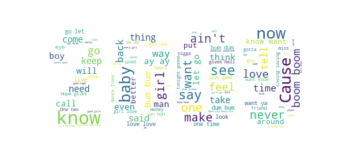

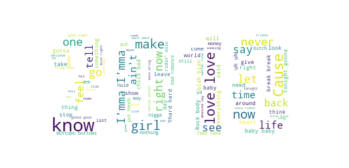

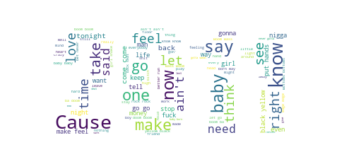

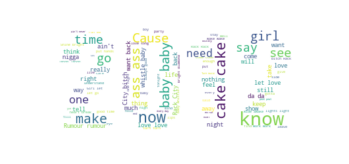

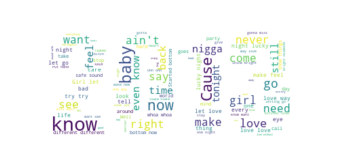

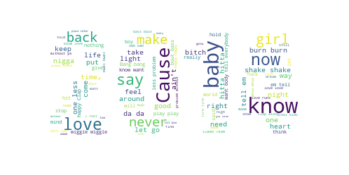

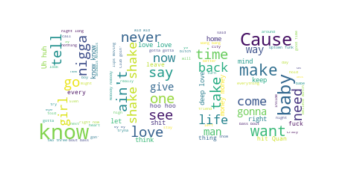

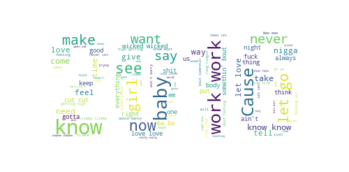

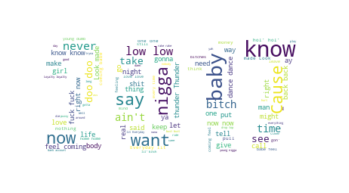

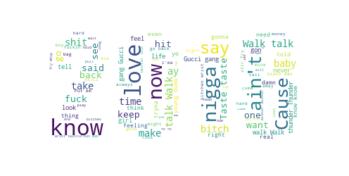

In [7]:
# show data visualization graphs
print('Showing data visualization...')
for i in range(2009, 2019):
    get_wordcloud_year(i, hot_songs)

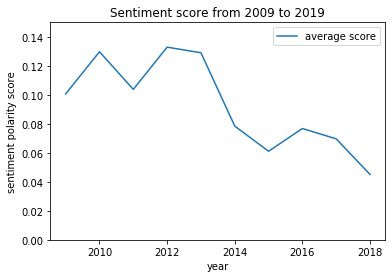

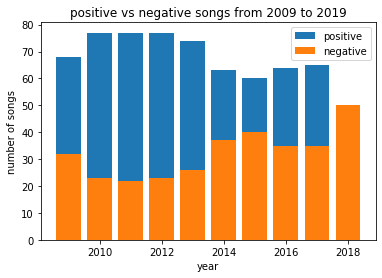

In [8]:
get_sentiment_trend(2009, 2019, hot_songs)

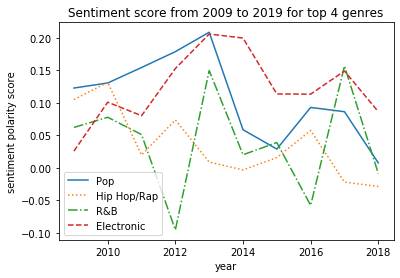

In [9]:
get_genre_sentiment(2009, 2019, hot_songs)

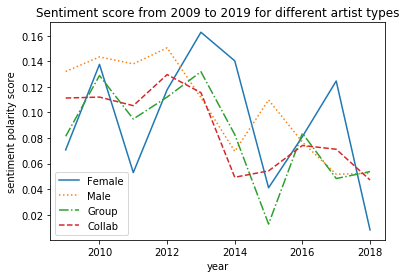

In [10]:
get_type_sentiment(2009, 2019, hot_songs)